In [1]:
## Purpose: The purpose of this code is to show radar data with a mask 

## Author: Katie McKeown

In [35]:
## First we need some packages 
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=matplotlib.cbook.MatplotlibDeprecationWarning)
%matplotlib inline
import glob 
from PIL import Image
from siphon.radarserver import RadarServer
from datetime import datetime, timedelta, timezone
from siphon.cdmr import Dataset
import numpy as np
from metpy.plots import ctables

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

## First, Libraries must be loaded in. 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image, display
import tempfile
import os
import shutil
from mpl_toolkits.basemap import Basemap

import pyart
from tint.data_utils import get_nexrad_keys, read_nexrad_key
from tint import Cell_tracks, animate
from tint.visualization import embed_mp4_as_gif

import pyart
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd

import matplotlib.dates as mdates
from matplotlib.dates import date2num, DateFormatter
import datetime as dt
import matplotlib.dates as dates


In [53]:
## Load in our first scan
data1 = pyart.io.read("KHGX_SDUS64_N0QHGX_202205310508")
data2 = pyart.io.read("KHGX_SDUS64_N0QHGX_202205310530")
data3 = pyart.io.read("KHGX_SDUS64_N0QHGX_202205310559")
data4 = pyart.io.read("KHGX_SDUS64_N0QHGX_202205310630")
data5 = pyart.io.read("KHGX_SDUS64_N0QHGX_202205310659")
data6 = pyart.io.read("KHGX_SDUS64_N0QHGX_202205310730")

In [54]:
## File 1
## This information is needed to get the latitude and longitude in the next section
sweep_0=data1.get_slice(0)
ref = data1.fields['reflectivity']['data'][sweep_0]##[:, -10:] = np.ma.masked
## We need to get our lats and lons from the gate information
lat = data1.gate_latitude['data'][sweep_0]
lon = data1.gate_longitude['data'][sweep_0]

threshold = 10
## Mask for the data to minimize anything below 10 dBz
ref_masked = np.full((360,460),np.nan)
for x in range(360): 
    for y in range(460):
        if ref[x,y] >= 10:
            ref_masked[x,y] = ref[x,y]


cm = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm = plt.Normalize(0,40)
## This is to check to see if things are working
##print(np.size(ref, 0))
##print(np.size(ref, 1))
##print(ref)
##print((ref_masked))

In [55]:
## We need to repeat the above steps for each radar file. But we'll do that sans comments

## File 2
sweep_02=data2.get_slice(0)
ref2 = data2.fields['reflectivity']['data'][sweep_02]
lat2 = data2.gate_latitude['data'][sweep_02]
lon2 = data2.gate_longitude['data'][sweep_02]

threshold = 10
ref_masked2 = np.full((360,460),np.nan)
for x in range(360): 
    for y in range(460):
        if ref2[x,y] >= 10:
            ref_masked2[x,y] = ref2[x,y]

cm2 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm2 = plt.Normalize(0,40)



## File 3
sweep_03=data3.get_slice(0)
ref3 = data3.fields['reflectivity']['data'][sweep_03]
lat3 = data3.gate_latitude['data'][sweep_03]
lon3 = data3.gate_longitude['data'][sweep_03]

threshold = 10
ref_masked3 = np.full((360,460),np.nan)
for x in range(360): 
    for y in range(460):
        if ref3[x,y] >= 10:
            ref_masked3[x,y] = ref3[x,y]

cm3 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm3 = plt.Normalize(0,40)


## File 4
sweep_04=data4.get_slice(0)
ref4 = data4.fields['reflectivity']['data'][sweep_04]
lat4 = data4.gate_latitude['data'][sweep_04]
lon4 = data4.gate_longitude['data'][sweep_04]

threshold = 10
ref_masked4 = np.full((360,460),np.nan)
for x in range(360): 
    for y in range(460):
        if ref4[x,y] >= 10:
            ref_masked4[x,y] = ref4[x,y]

cm4 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm4 = plt.Normalize(0,40)


## File 5
sweep_05=data5.get_slice(0)
ref5 = data5.fields['reflectivity']['data'][sweep_05]
lat5 = data5.gate_latitude['data'][sweep_05]
lon5 = data5.gate_longitude['data'][sweep_05]

threshold = 10
ref_masked5 = np.full((360,460),np.nan)
for x in range(360): 
    for y in range(460):
        if ref5[x,y] >= 10:
            ref_masked5[x,y] = ref5[x,y]

cm5 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm5 = plt.Normalize(0,40)


## File 6
sweep_06=data6.get_slice(0)
ref6 = data6.fields['reflectivity']['data'][sweep_06]
lat6 = data6.gate_latitude['data'][sweep_06]
lon6 = data6.gate_longitude['data'][sweep_06]

threshold = 10
ref_masked6 = np.full((360,460),np.nan)
for x in range(360): 
    for y in range(460):
        if ref6[x,y] >= 10:
            ref_masked6[x,y] = ref6[x,y]

cm6 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm6 = plt.Normalize(0,40)

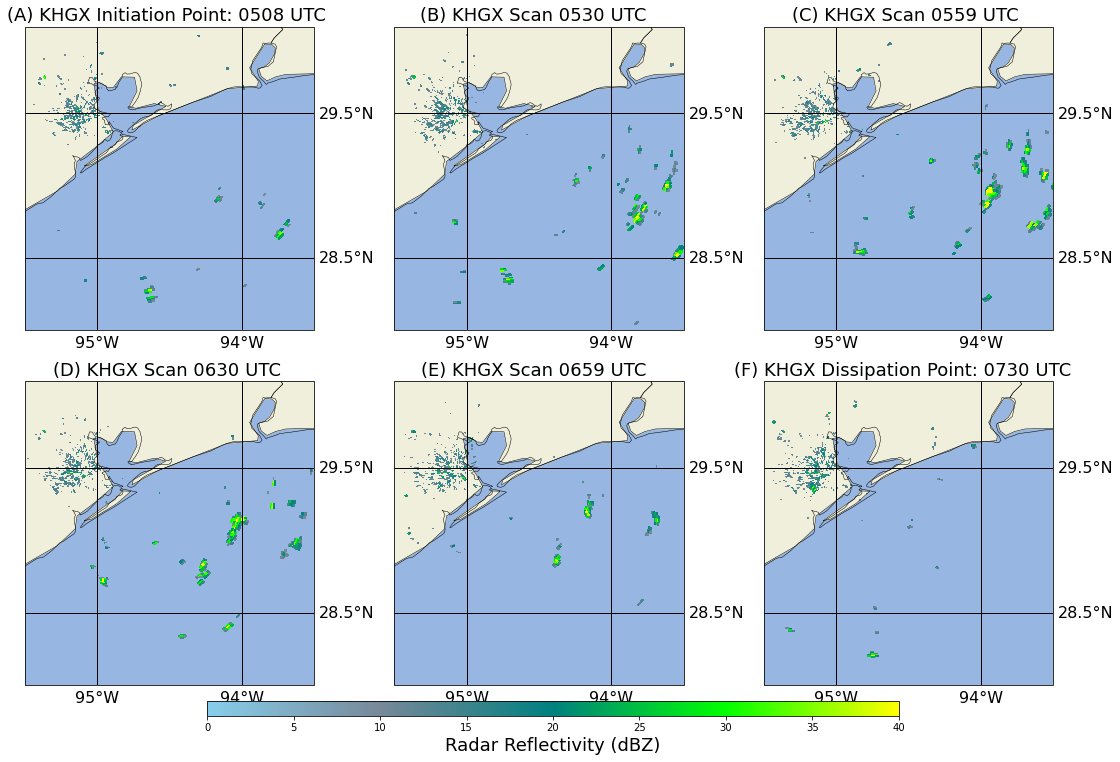

In [88]:
## Let's tryy making a multipanel radar plot
from mpl_toolkits.axes_grid1 import make_axes_locatable
crs = ccrs.PlateCarree()

def plot_background(ax):
    ax.set_extent([-93.5, -95.5 ,28.0, 30.1])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
    land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    ##ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
    g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
    g1.xlabels_top = False
    g1.ylabels_left = False
    g1.xlines = True
    g1.ylines = True
    g1.xlocator = mticker.FixedLocator([-94, -95, -96])
    g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
    g1.yformatter = LATITUDE_FORMATTER
    g1.xformatter = LONGITUDE_FORMATTER
    g1.xlabel_style = {'size': 16, 'color':'black'}
    g1.ylabel_style = {'size': 16, 'color':'black'}
    ax.add_feature(ocean, zorder=-1)
    ax.add_feature(land, zorder=-1)
    return ax

fig, axarr = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), constrained_layout=True,
                          subplot_kw={'projection': crs}, layout='tight')

axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)
    
## Top Left Panel
axlist[0].set_title("(A) KHGX Initiation Point: 0508 UTC ", fontsize = 18)
mesh=axlist[0].pcolormesh(lon,lat, ref_masked, cmap=cm, norm = ref_norm, zorder=0)

## Top Middle Panel
axlist[1].set_title("(B) KHGX Scan 0530 UTC  ", fontsize = 18)
mesh=axlist[1].pcolormesh(lon2,lat2, ref_masked2, cmap=cm2, norm = ref_norm2, zorder=0)

## Top Right Panel
axlist[2].set_title("(C) KHGX Scan 0559 UTC ", fontsize = 18)
mesh=axlist[2].pcolormesh(lon3,lat3, ref_masked3, cmap=cm3, norm = ref_norm3, zorder=0)

## Bottom Left Panel
axlist[3].set_title("(D) KHGX Scan 0630 UTC ", fontsize = 18)
mesh=axlist[3].pcolormesh(lon4,lat4, ref_masked4, cmap=cm4, norm = ref_norm4, zorder=0)

## Bottom Middle Panel
axlist[4].set_title("(E) KHGX Scan 0659 UTC  ", fontsize = 18)
mesh5=axlist[4].pcolormesh(lon5,lat5, ref_masked5, cmap=cm5, norm = ref_norm5, zorder=0)
# Add a colorbar axis at the bottom of the graph
##cb = plt.colorbar(mesh, location = 'bottom', anchor=(0.5,0.5))
##cb.set_label(r'Radar Reflectivity (dBZ)', size='x-large')

## Bottom Right Panel
axlist[5].set_title("(F) KHGX Dissipation Point: 0730 UTC  ", fontsize = 18)
mesh=axlist[5].pcolormesh(lon6,lat6, ref_masked6, cmap=cm6, norm = ref_norm6, zorder=0)



cbar_ax = fig.add_axes([0.2, 0, 0.6, 0.02])
# Draw the colorbar
cbar=plt.colorbar(mesh, cax=cbar_ax,orientation='horizontal')
cbar.set_label(r'Radar Reflectivity (dBZ)', size=18)
plt.tight_layout()

plt.savefig('6-panel-radar.png')

In [67]:
## New Radar Figure for Paper 1

data1 = pyart.io.read("KHGX_SDUS54_N0QHGX_201806271801")
data2 = pyart.io.read("KHGX_SDUS54_N0QHGX_201906221747")

In [45]:
## File 1
## This information is needed to get the latitude and longitude in the next section
sweep_0=data1.get_slice(0)
ref = data1.fields['reflectivity']['data'][sweep_0]##[:, -10:] = np.ma.masked
## We need to get our lats and lons from the gate information
lat = data1.gate_latitude['data'][sweep_0]
lon = data1.gate_longitude['data'][sweep_0]

threshold = 10
## Mask for the data to minimize anything below 10 dBz
ref_masked = np.full((360,460),np.nan)
for x in range(360): 
    for y in range(460):
        if ref[x,y] >= 10:
            ref_masked[x,y] = ref[x,y]


cm = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm = plt.Normalize(0,40)

## File 1
## This information is needed to get the latitude and longitude in the next section
sweep_02=data2.get_slice(0)
ref2 = data2.fields['reflectivity']['data'][sweep_02]##[:, -10:] = np.ma.masked
## We need to get our lats and lons from the gate information
lat2 = data2.gate_latitude['data'][sweep_02]
lon2 = data2.gate_longitude['data'][sweep_02]

threshold2 = 10
## Mask for the data to minimize anything below 10 dBz
ref_masked2 = np.full((360,460),np.nan)
for x in range(360): 
    for y in range(460):
        if ref2[x,y] >= 10:
            ref_masked2[x,y] = ref2[x,y]


cm2 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm2 = plt.Normalize(0,40)

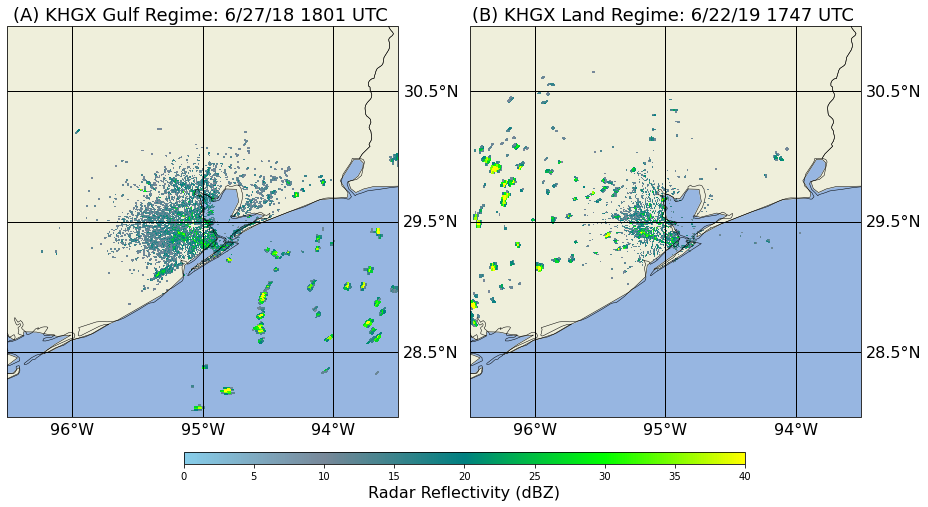

In [52]:

crs = ccrs.PlateCarree()

def plot_background(ax):
    ax.set_extent([-93.5, -96.5 ,28.0, 31])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
    land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    ##ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
    g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
    g1.xlabels_top = False
    g1.ylabels_left = False
    g1.xlines = True
    g1.ylines = True
    g1.xlocator = mticker.FixedLocator([-94, -95, -96])
    g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
    g1.yformatter = LATITUDE_FORMATTER
    g1.xformatter = LONGITUDE_FORMATTER
    g1.xlabel_style = {'size': 16, 'color':'black'}
    g1.ylabel_style = {'size': 16, 'color':'black'}
    ax.add_feature(ocean, zorder=-1)
    ax.add_feature(land, zorder=-1)
    return ax

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(13, 8), constrained_layout=True,
                          subplot_kw={'projection': crs})

axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)
    
## Top Left Panel
axlist[0].set_title("(A) KHGX Gulf Regime: 6/27/18 1801 UTC ", fontsize = 18)
mesh=axlist[0].pcolormesh(lon,lat, ref_masked, cmap=cm, norm = ref_norm, zorder=0)

## Top Middle Panel
axlist[1].set_title("(B) KHGX Land Regime: 6/22/19 1747 UTC ", fontsize = 18)
mesh=axlist[1].pcolormesh(lon2,lat2, ref_masked2, cmap=cm2, norm = ref_norm2, zorder=0)

cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.02])
# Draw the colorbar
cbar=fig.colorbar(mesh, cax=cbar_ax,orientation='horizontal')
cbar.set_label(r'Radar Reflectivity (dBZ)', size=16)
plt.tight_layout()


plt.savefig('2-panel-radar.png')